<a href="https://colab.research.google.com/github/kjedrzejczak/Machine_Learning_Bootcamp_practice_II/blob/main/03_kmeans_elbow_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.4)

generowanie danych

In [4]:
from sklearn.datasets import make_blobs

data = make_blobs(n_samples=1000, centers=4, cluster_std=1.5, center_box=(-8.0, 8.0), random_state=42)[0] # 👈 !! [0]
df = pd.DataFrame(data, columns=['x1', 'x2'])

px.scatter(df, 'x1', 'x2', width=900, height=500, title='Algorytm K-średnich', template='plotly_dark')

algorytm K-średnich

In [5]:
from sklearn.cluster import KMeans

kmeans= KMeans(n_clusters=5)
kmeans.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=5)

In [7]:
# wcss
kmeans.inertia_

3850.7983063730026

In [8]:
y_kmeans = kmeans.predict(data) # przypisanie klastró do próbek
df['y_kmeans'] = y_kmeans
df.head()

,x1,x2,y_kmeans
0,-6.645730,5.470461,1
1,-4.390559,-5.055149,2
2,-4.666211,-5.390080,2
3,3.022862,0.303769,0
4,3.322516,-0.676179,0


In [10]:
px.scatter(df, 'x1', 'x2', 'y_kmeans', width=900, height=500, title='Algorytm K-średnich - 5 klastrów', template='plotly_dark')

WCSS - Within Cluster Sum of Squared

In [ ]:
wcss = []
for i in range(2, 10):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(data)
  wcss.append(kmeans.inertia_)

print(wcss)

In [13]:
print(wcss)

[23414.04045869599, 7734.886635126095, 4282.137026938607, 3851.1336297332527, 3444.8426017907404, 3035.6277685453424, 2714.851072415606, 2471.0051725633853]


In [18]:
wcss = pd.DataFrame(wcss, columns=['wcss'])
wcss = wcss.reset_index()
wcss = wcss.rename(columns={'index':'clusters'})
wcss['clusters'] += 2  # 👈👈👈👈👈✨😶‍🌫️
wcss.head()

,clusters,wcss
0,2,23414.040459
1,3,7734.886635
2,4,4282.137027
3,5,3851.133630
4,6,3444.842602


# Elbow method

In [19]:
px.line(wcss, x='clusters', y='wcss', width=900, height=500, title='Within Clsuters Sum of Squared Errors (WCSS)', template='plotly_dark')

#############################

In [20]:
kmeans= KMeans(n_clusters=3)
kmeans.fit(data)

y_kmeans = kmeans.predict(data)
df['y_kmeans'] = y_kmeans


px.scatter(df, 'x1', 'x2', 'y_kmeans', width=900, height=500, title='Algorytm K-średnich - 3 klastrów', template='plotly_dark')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



środki centroidów

In [21]:
centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=['c1', 'c2'])
centers

,c1,c2
0,-4.678306,6.633539
1,-5.302413,-5.404200
2,3.630348,1.808377


In [24]:
fig = px.scatter(df, 'x1', 'x2', 'y_kmeans', width=900, height=500, title='Algorytm K-średnich - 3 klastrów', template='plotly_dark')
fig.add_trace(go.Scatter(x=centers['c1'], y=centers['c2'], mode='markers',
                  marker={'size':12, 'color':'LightSkyBlue', 'line':{'width':2, 'color': 'tomato'}},
                  showlegend=False))
fig.show()

Granice decyzyjne

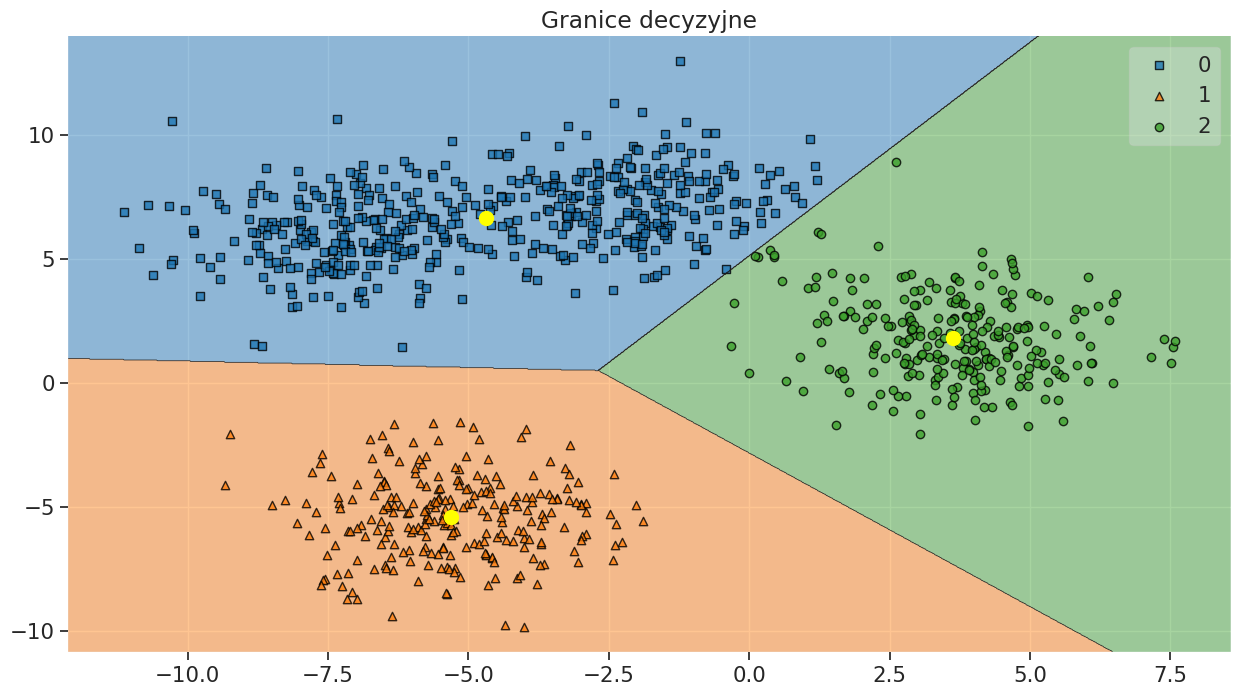

In [26]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(15, 8))
plt.title('Granice decyzyjne')
plot_decision_regions(data, y_kmeans, clf=kmeans, legend=1)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow')
plt.show()